# Neural network introduction

Neural networks are a complicated set of multiplies and adds of many variables. They perform a linear model fitting. The model can be quite complex, and may include many cross product terms. The model is constructed by training the network, and then testing the network. We never know exactly what the network is doing...

Step 1 is to install the neuralnet package (There are many others, but this one works OK)

In [99]:
#install.packages("neuralnet")

The next step is to normalize the data.
## Normalization is critical to neural network training and usage
Don't forget to normalize your data

The typical normalization is to make the data fit the range from 0 to 1, or -1 to +1. A neural network can be used to perform clasification, or perform a simple linear regression.

There are many tutorials that use the Boston home prices...

We will use that also

In [100]:
library(MASS)

In [101]:
bob <- Boston

In [102]:
head(bob,4)
#crim - what is crime level
#zn - lies in which zone
# black - how many black ppl live there
# tax - tax in that area

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [103]:
nrow(bob)

[1] 506

This has 506 different rows. Perform a quick check on the rows and make sure everything is a number...

Use the handy is.na function to see if any of the numbers had a problem

The apply function second argument value of 2 means go down the columns

In [104]:
apply(bob,2,function(x) { sum(is.na(x))})

crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
      0       0       0       0       0       0       0       0       0       0 
ptratio   black   lstat    medv 
      0       0       0       0

Great, all the columns have no NA values. The numbers are good. If they did, then you would need to go through the data set and fix the issues, or remove the row.

Next, select a training and a test data set. We will use 80%

Use the handy select function to randomly select some data. (You may want to seed the random number generator, or you will get something different every time you run the code)


In [105]:
set.seed(1234)
nr <- nrow(bob)
nr

[1] 506

In [106]:
#picking random samples for creating training data
s_index <- sample(nr,0.8*nr)
head(s_index,10)


[1]  58 315 308 314 433 321   5 117 332 256

Remember that in R, a positive index means select this item (A row in this case) and a negative index means to select everything except this row. We use a minus on the index to select all those things that were not in the training set.

In [107]:
train <- bob[s_index,]
testit <- bob[-s_index,]
#Splitting the data into 2 parts, one is train(80% of all data) and other is test data(20% of all data)

In [108]:
nrow(train)
nrow(testit)

[1] 404

[1] 102

In [109]:
lm.train <- lm(medv ~ .,train)

In [110]:
summary(lm.train)


Call:
lm(formula = medv ~ ., data = train)

Residuals:
        Min          1Q      Median          3Q         Max 
-13.5365601  -2.9124571  -0.5460311   1.8481268  24.9148379 

Coefficients:
                 Estimate    Std. Error  t value               Pr(>|t|)    
(Intercept)  44.900576554   6.016979871  7.46231     0.0000000000005588 ***
crim         -0.084999926   0.049891916 -1.70368              0.0892372 .  
zn            0.047218572   0.015849020  2.97927              0.0030701 ** 
indus         0.038248982   0.070941560  0.53916              0.5900828    
chas          2.724575489   0.966685288  2.81847              0.0050711 ** 
nox         -19.139048442   4.382515002 -4.36714     0.0000161519318200 ***
rm            2.949427833   0.479981904  6.14487     0.0000000019774790 ***
age          -0.007757018   0.015670499 -0.49501              0.6208734    
dis          -1.558391246   0.224866715 -6.93029     0.0000000000174628 ***
rad           0.302988454   0.076672548  3.9517

In [111]:
mean.square.error <- function(x.actual,x.predict) sum((x.actual-x.predict)^2)/length(x.actual)

In [112]:
lm.predict <- predict(lm.train,testit)
#first param is linear model and 2nd one is data to test at

In [113]:
summary(lm.predict)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 8.32907 16.80731 22.70537 22.90709 28.05901 39.50195 

In [114]:
mean.square.error(testit$medv,lm.predict)

[1] 18.93610544

Now to normalize the data. First, find the min and max of the data items

In [115]:
train.max <- apply(train,2,max)
train.min <- apply(train,2,min)

In [116]:
train.max
train.min

crim       zn    indus     chas      nox       rm      age      dis 
 73.5341 100.0000  27.7400   1.0000   0.8710   8.7800 100.0000  12.1265 
     rad      tax  ptratio    black    lstat     medv 
 24.0000 711.0000  22.0000 396.9000  37.9700  50.0000

crim        zn     indus      chas       nox        rm       age       dis 
  0.00632   0.00000   0.46000   0.00000   0.38500   3.56100   6.20000   1.12960 
      rad       tax   ptratio     black     lstat      medv 
  1.00000 187.00000  12.60000   2.52000   1.73000   5.00000

Now scale the data between 0 and 1. Use the train.min, and the train.max and the handy scale function. This function returns a matrix, and we convert it back to a data frame with as.data.frame

In [117]:
train.scaled <- as.data.frame(scale(train,scale=train.max-train.min,center=train.min))

In [118]:
head(train.scaled,4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
58,0.0001088024145,1.00,0.03152492669,0,0.05349794239,0.6236826978,0.3656716418,0.6542934827,0.1739130435,0.13167938931,0.2659574468,0.9898574978,0.06125827815,0.5911111111
315,0.0049352775237,0.00,0.34604105572,0,0.32716049383,0.5759724085,0.8646055437,0.2248542771,0.1304347826,0.22328244275,0.6170212766,0.9969318931,0.20833333333,0.4177777778
308,0.0005848129782,0.33,0.06304985337,0,0.17901234568,0.6300057482,0.6833688699,0.1866980695,0.2608695652,0.06679389313,0.6170212766,1.0000000000,0.16004415011,0.5155555556
314,0.0035776953962,0.00,0.34604105572,0,0.32716049383,0.5182985246,0.8166311301,0.1939819404,0.1304347826,0.22328244275,0.6170212766,0.9910999544,0.17025386313,0.3688888889


We will want to scale the test set to use it in the neural network...

In [119]:
testit.scaled <- as.data.frame(scale(testit,scale=train.max-train.min,center=train.min))

In [120]:
head(testit.scaled,4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
2,0.0002854703352,0.000,0.2423020528,0,0.1728395062,0.5479977007,0.7750533049,0.3489619802,0.04347826087,0.1049618321,0.5531914894,1.0000000000,0.2044701987,0.3688888889
10,0.0022266414136,0.125,0.2716275660,0,0.2860082305,0.4680973367,0.8496801706,0.4967308969,0.17391304348,0.2366412214,0.2765957447,0.9741619758,0.4241169978,0.3088888889
13,0.0011894823970,0.125,0.2716275660,0,0.2860082305,0.4460624641,0.3496801706,0.3929561967,0.17391304348,0.2366412214,0.2765957447,0.9837719966,0.3857615894,0.3711111111
18,0.0105794027781,0.000,0.2815249267,0,0.3148148148,0.4654148304,0.8049040512,0.2844710782,0.13043478261,0.2290076336,0.8936170213,0.9742634008,0.3570640177,0.2777777778


The formula mechanism on a neural network needs the formula specified ahead of time. It can't bind as well as lm does to the data frame

In [121]:
train.names <- names(train)
train.names
tindenpendent <- paste(train.names[!train.names %in% "medv"],collapse=" + ")
formx <- as.formula(paste("medv ~ ",tindenpendent))
formx

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

In [122]:
library(neuralnet)
nn <- neuralnet(formx,data=train.scaled,
                hidden=c(4,3),linear.output=T,
                stepmax=3e5,rep=5,
               algorithm="rprop+")
nn

$call
neuralnet(formula = formx, data = train.scaled, hidden = c(4, 
    3), stepmax = 300000, rep = 5, algorithm = "rprop+", linear.output = T)

$response
             medv
58  0.59111111111
315 0.41777777778
308 0.51555555556
314 0.36888888889
433 0.24666666667
321 0.41777777778
5   0.69333333333
117 0.36000000000
332 0.26888888889
256 0.35333333333
345 0.58222222222
270 0.34888888889
140 0.28444444444
456 0.20222222222
144 0.23555555556
412 0.27111111111
141 0.20000000000
131 0.31555555556
92  0.37777777778
114 0.30444444444
154 0.32000000000
147 0.23555555556
77  0.33333333333
20  0.29333333333
106 0.32222222222
390 0.14444444444
253 0.54666666667
439 0.07555555556
398 0.07777777778
22  0.32444444444
218 0.52666666667
126 0.36444444444
145 0.15111111111
240 0.40666666667
86  0.48000000000
358 0.37111111111
95  0.34666666667
122 0.34000000000
465 0.36444444444
378 0.18444444444
258 1.00000000000
301 0.44000000000
474 0.55111111111
288 0.40444444444
153 0.22888888889
232 0.5933333333

In [123]:
test.raw <- compute(nn,testit.scaled[,-14])
head(test.raw$net.result,3)

2,0.3834825325
10,0.3309235600
13,0.3710730438


Now to rescale the data back to full scale (It was normalized to 0 to 1)

But first, what does a neural network look like? It starts with a multiplication of the inputs by constants, and then summing them to get an output. That output is then multiplied by weights, and those are summed. The picture below will illustrate the model.

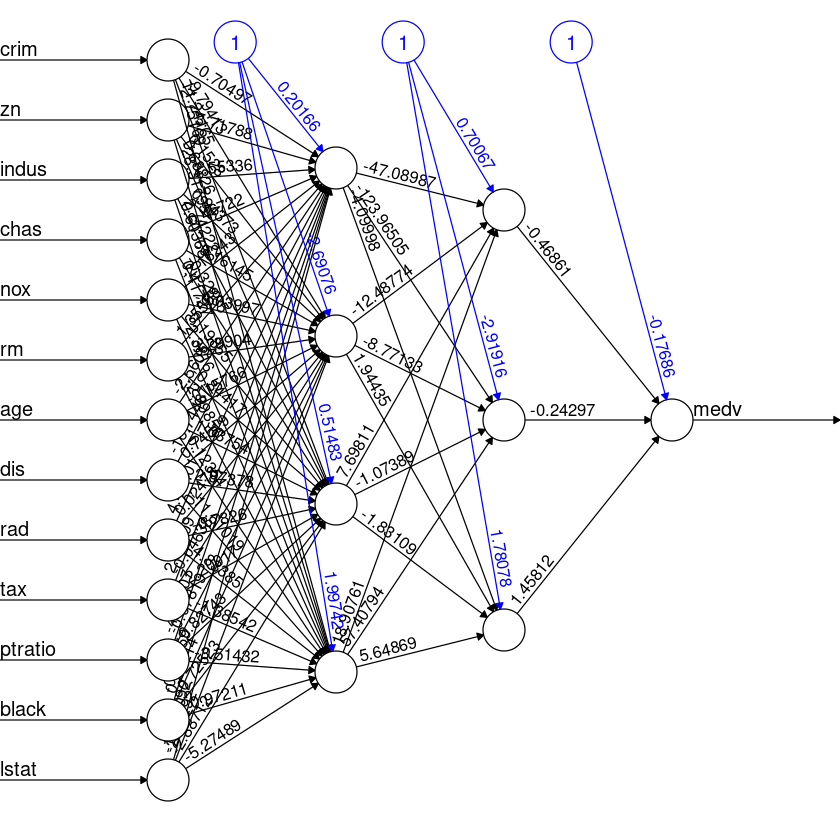

In [124]:
plot(nn,rep="best")

In [125]:
predict.scaled <- test.raw$net.result*(train.max["medv"]-train.min["medv"])+train.min["medv"]

In [126]:
head(predict.scaled,4)

2,22.25671396
10,19.89156020
13,21.69828697
18,17.50642230


In [127]:
mean.square.error(testit$medv,predict.scaled)

[1] 12.27714335

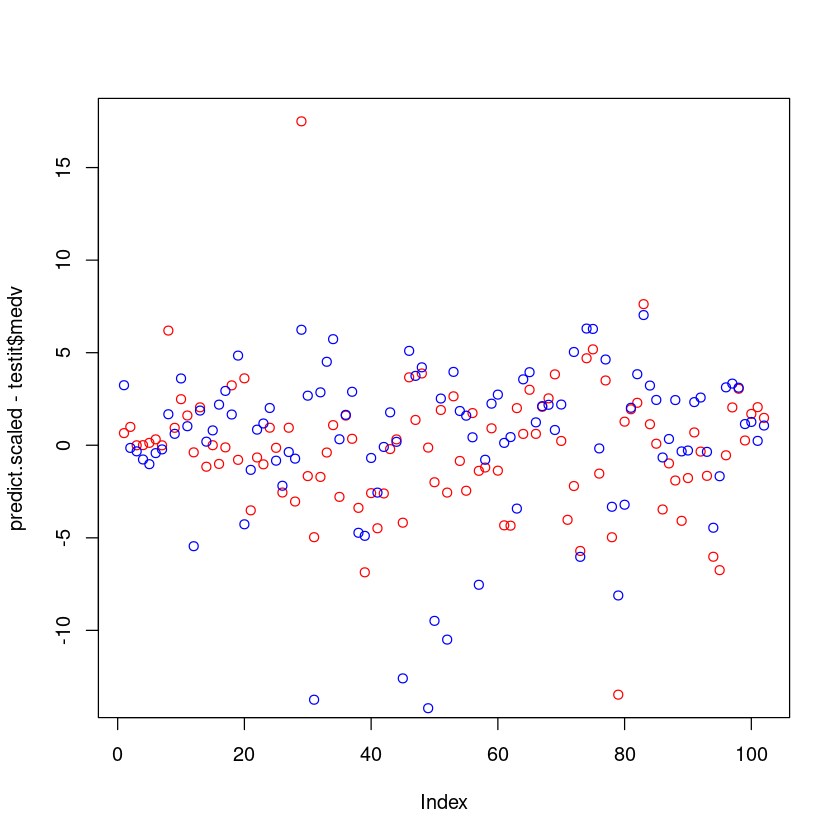

In [128]:
plot(predict.scaled-testit$medv,col="red")
points(lm.predict-testit$medv,col="blue")

In [129]:
cor(bob)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00000000000,-0.2004692197,0.40658341141,-0.055891582222,0.42097171139,-0.21924670286,0.35273425090,-0.37967008695,0.625505145263,0.58276431203,0.2899455793,-0.38506394199,0.45562147945,-0.3883046086
zn,-0.20046921966,1.0000000000,-0.53382818630,-0.042696719296,-0.51660370783,0.31199058737,-0.56953734210,0.66440822276,-0.311947826019,-0.31456332468,-0.3916785479,0.17552031738,-0.41299457453,0.3604453425
indus,0.40658341141,-0.5338281863,1.00000000000,0.062938027490,0.76365144692,-0.39167585266,0.64477851136,-0.70802698874,0.595129274604,0.72076017995,0.3832475564,-0.35697653510,0.60379971648,-0.4837251600
chas,-0.05589158222,-0.0426967193,0.06293802749,1.000000000000,0.09120280684,0.09125122504,0.08651777425,-0.09917578017,-0.007368240886,-0.03558651759,-0.1215151737,0.04878848496,-0.05392929838,0.1752601772
nox,0.42097171139,-0.5166037078,0.76365144692,0.091202806842,1.00000000000,-0.30218818785,0.73147010379,-0.76923011323,0.611440563486,0.66802320040,0.1889326771,-0.38005063779,0.59087892088,-0.4273207724
rm,-0.21924670286,0.3119905874,-0.39167585266,0.091251225043,-0.30218818785,1.00000000000,-0.24026493105,0.20524621293,-0.209846667766,-0.29204783262,-0.3555014946,0.12806863509,-0.61380827187,0.6953599471
age,0.35273425090,-0.5695373421,0.64477851136,0.086517774255,0.73147010379,-0.24026493105,1.00000000000,-0.74788054087,0.456022451752,0.50645559355,0.2615150117,-0.27353397664,0.60233852873,-0.3769545650
dis,-0.37967008695,0.6644082228,-0.70802698874,-0.099175780175,-0.76923011323,0.20524621293,-0.74788054087,1.00000000000,-0.494587929672,-0.53443158441,-0.2324705424,0.29151167313,-0.49699583086,0.2499287341
rad,0.62550514526,-0.3119478260,0.59512927460,-0.007368240886,0.61144056349,-0.20984666777,0.45602245175,-0.49458792967,1.000000000000,0.91022818853,0.4647411785,-0.44441281558,0.48867633498,-0.3816262306
tax,0.58276431203,-0.3145633247,0.72076017995,-0.035586517586,0.66802320040,-0.29204783262,0.50645559355,-0.53443158441,0.910228188533,1.00000000000,0.4608530351,-0.44180800672,0.54399341200,-0.4685359336


In [130]:
keepers <- c('lstat','rm',
            'tax','ptratio')

In [131]:
t2<- bob[,c(keepers,'medv')]

In [132]:
train2 <-t2[s_index,]
test2 <-t2[-s_index,]

In [133]:
max2 = apply(train2,2,max)
min2 = apply(train2,2,min)

In [134]:
head(max2)

lstat      rm     tax ptratio    medv 
  37.97    8.78  711.00   22.00   50.00

In [135]:
train2.scaled=scale(train2,scale=max2-min2,center=min2)
test2.scaled=scale(test2,scale=max2-min2,center=min2)

In [136]:
head(train2.scaled)

,lstat,rm,tax,ptratio,medv
58,0.06125827815,0.6236826978,0.13167938931,0.2659574468,0.5911111111
315,0.20833333333,0.5759724085,0.22328244275,0.6170212766,0.4177777778
308,0.16004415011,0.6300057482,0.06679389313,0.6170212766,0.5155555556
314,0.17025386313,0.5182985246,0.22328244275,0.6170212766,0.3688888889
433,0.28421633554,0.5487641311,0.91412213740,0.8085106383,0.2466666667
321,0.15093818985,0.5489557386,0.19083969466,0.7446808511,0.4177777778


In [137]:
nn2 <- neuralnet(medv ~ tax + lstat + rm + ptratio,
                 data=train2.scaled,hidden=c(5,4,3),linear.output=T,
                 stepmax=3e5,rep=5,
                 algorith="rprop+")

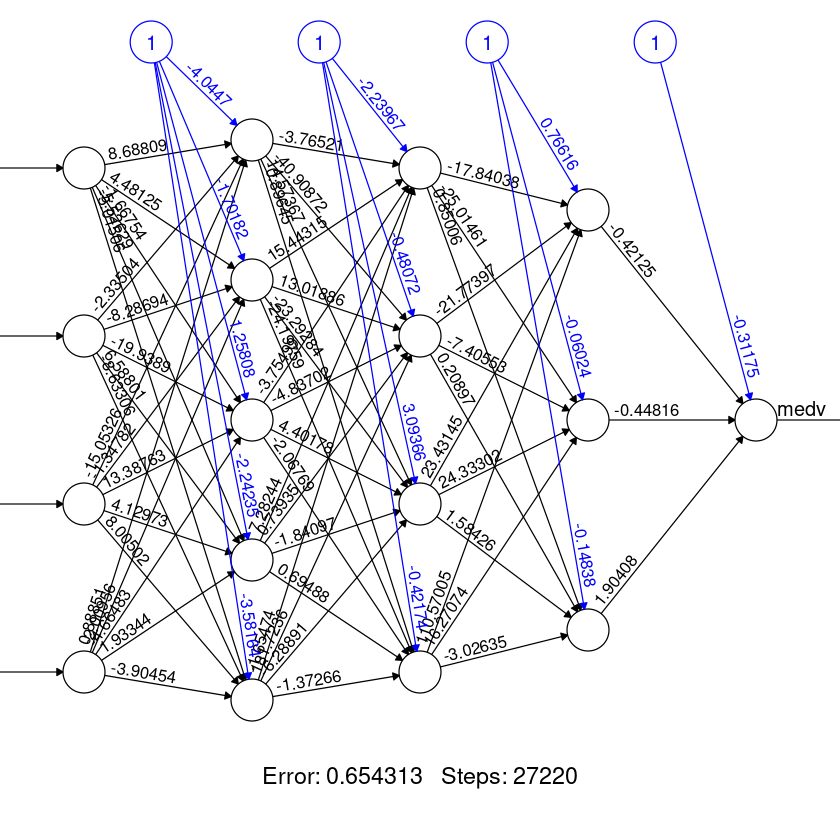

In [138]:
plot(nn2,rep="best")

In [139]:
nn2.res <- compute(nn2,test2.scaled[,-5])

In [140]:
head(nn2.res$net.result)

2,0.2027938664
10,0.2395807793
13,0.2522492637
18,0.1927371245
24,0.1752775019
28,0.1785503229


In [146]:
#Rescaling the result back to original values
pred2.scaled <- nn2.res$net.result*(max2[5]-min2[5])+min2[5]

In [147]:
head(pred2.scaled)

2,14.12572399
10,15.78113507
13,16.35121687
18,13.67317060
24,12.88748759
28,13.03476453


In [149]:
mean.square.error(test2$medv,pred2.scaled)

[1] 159.3695173